# 📌 K-Nearest Neighbors (KNN) ברגרסיה

## **מבוא**
שיטת **$K-Nearest Neighbors (KNN)$** היא שיטה לא-פרמטרית ($Nonparametric$) לחיזוי המשתנה התלוי \( $Y$ \) על בסיס משתנה אחד או יותר .  
**יתרון מרכזי:** השיטה אינה מניחה צורה פונקציונלית מסוימת עבור \( $f(X) $\), ולכן היא **גמישה ומתאימה למצבים שבהם הקשרים בין המשתנים אינם ליניאריים**.

המטרה היא לאמוד את הקשר:
$$
Y = f (X) + \varepsilon
$$
כאשר \($ \varepsilon$ \) הוא שגיאה אקראית בעלת תוחלת אפס.

---

## **📌 עקרון הפעולה של KNN**
1. **בחירת מספר שכנים \( $K $\)**.
2. **זיהוי \($ K$ \) התצפיות הקרובות ביותר לנקודה \( $x_0 $\)**.
3. **חיזוי הערך \( $\hat{f}(x_0)$ \)** על ידי ממוצע ערכי \( $Y$ \) של השכנים הקרובים:

$$
\hat{f}(x_0) = \frac{1}{K} \sum_{x_i \in N_K (x_0)} y_i
$$

📌 **מה קובע את איכות המודל?**  
- הערך של \( $K$ \) משפיע ישירות על **האיזון בין שונות ($Variance$) להטיה ($Bias$) י**.

---

## **📌 השפעת בחירת \( $K$ \) על הביצועים**
🔹 **ערך נמוך של \( $K$ \) (למשל, \( $K=1$ \))**  
   - מביא להתאמה גמישה מאוד לנתונים, אך **רגיש לרעש**.
   - **יתרון:** הטיה נמוכה (מודל מתאים את עצמו לנתונים בצורה טובה).
   - **חיסרון:** שונות גבוהה ($Overfitting$ - למידת יתר).

🔹 **ערך גבוה של \( $K$ \) (למשל, \( $K=20$ \))**  
   - גורם להחלקה חזקה יותר של הנתונים.
   - **יתרון:** שונות נמוכה (המודל יציב יותר).
   - **חיסרון:** הטיה גבוהה ($Underfitting$ - למידת חסר).

---

## **📌 השוואה בין $KNN$ לרגרסיה ליניארית**
| תכונה | $KNN$ | רגרסיה ליניארית |
|--------|----------------|----------------|
| **הנחות מוקדמות** | ללא הנחות לגבי \( $f(X)$ \) | מניחה קשר ליניארי בין המשתנים |
| **גמישות** | גמיש מאוד, מתאים גם לקשרים לא ליניאריים | מוגבל ליחסים ליניאריים |
| **רגישות לרעש** | גבוהה כאשר \( $K$ \) קטן | נמוכה יחסית |
| **מורכבות חישובית** | גבוהה (תלויה בגודל המדגם) | נמוכה (חישוב מקדמים בלבד) |

📌 **י $KNN$ מתאים למקרים בהם הקשר בין המשתנים אינו ידוע מראש, בעוד שרגרסיה ליניארית עדיפה כאשר הקשר ליניארי.**

---

## **📌 השפעת ריבוי ממדים ב-$KNN$ ($Curse of Dimensionality$)י**

### **🔹 הבעיה של ריבוי ממדים**
כאשר מספר המשתנים הבלתי תלויים (\( $p$ \)) גדל, $KNN$ נתקל בבעיית **"קללת המימדיות" ($Curse of Dimensionality$)**, שגורמת לכך שהמודל הופך לפחות יעיל:

1. **התצפיות מתרחקות זו מזו**  
   - במימד אחד או שניים, נקודות סמוכות הן קרובות יחסית.
   - כאשר יש **הרבה משתנים**, כל נקודה נמצאת רחוק מנקודות אחרות, ולכן השכנים הקרובים אינם קרובים באמת.

2. **המרחק האוקלידי מאבד משמעות**  
   - $KNN$ משתמש לרוב **במרחק אוקלידי** ($Euclidean Distance$) כדי למצוא את השכנים הקרובים ביותר:
   $$
   d(A, B) = \sqrt{(X_1^A - X_1^B)^2 + (X_2^A - X_2^B)^2 + \dots + (X_p^A - X_p^B)^2}
   $$
   - ככל ש-\($ p $\) גדל, ההבדלים בין תצפיות נהיים **יותר אחידים**, והמרחקים מאבדים משמעות.

3. **נתוני האימון אינם מכסים היטב את המרחב**  
   - ככל שמוסיפים ממדים, הנתונים **מפוזרים יותר**.
   - זה גורם לכך שקשה למצוא **שכנים קרובים מספיק**, מה שמגביר שונות ויוצר חיזויים גרועים.

---

### **🔹 פתרונות לבעיית ריבוי ממדים ב- $KNN$ **
1. **שימוש בבחירת תכונות ($Feature Selection$)**  
   - ניתן **להשמיט משתנים לא רלוונטיים** כדי להפחית את המימדיות.
   - לדוגמה, ניתן להשתמש **בשיטות בחירת משתנים** כמו $PCA$ כדי להקטין את מספר הממדים.

2. **שימוש במטריקות מרחק מתאימות**  
   - **מרחק מנורמל ($Manhattan Distance$)** מתאים יותר כאשר יש מימדים רבים:
   $$
   d(A, B) = \sum_{i=1}^{p} |X_i^A - X_i^B|
   $$
   - **משקול משתנים ($Weighted Distance$)** כך שממדים חשובים יותר ישפיעו יותר.

3. **הגדלת \( $K $\) למקרים של מימד גבוה**  
   - ככל שמספר המשתנים עולה, מומלץ להשתמש **ב-\( $K $\) גדול יותר** כדי להפחית את הרעש.

---

## **📌 סיכום**
✔ **י $ KNN$ הוא מודל לא-פרמטרי המספק גמישות רבה ומאפשר ללמוד קשרים לא ליניאריים.**  
✔ **בחירת \( $K $\) משפיעה על איזון בין הטיה לשונות – יש לבחור ערך מיטבי לניבוי טוב.**  
✔ **י$KNN$ רגיש מאוד לבעיית ריבוי ממדים ("קללת המימדיות"), מה שעלול להוריד את דיוקו.**  
✔ **באמצעות הקטנת מספר המשתנים ושימוש במטריקות מתאימות, ניתן לשפר את ביצועי $KNN$ במרחבים מרובי ממדים.**

📌 **באמצעות בחירה נכונה של \( $K$ \), תכונות, ושיטות חישוב מרחק, ניתן להשיג איזון מוצלח בין דיוק ויציבות בניבוי! 🚀**

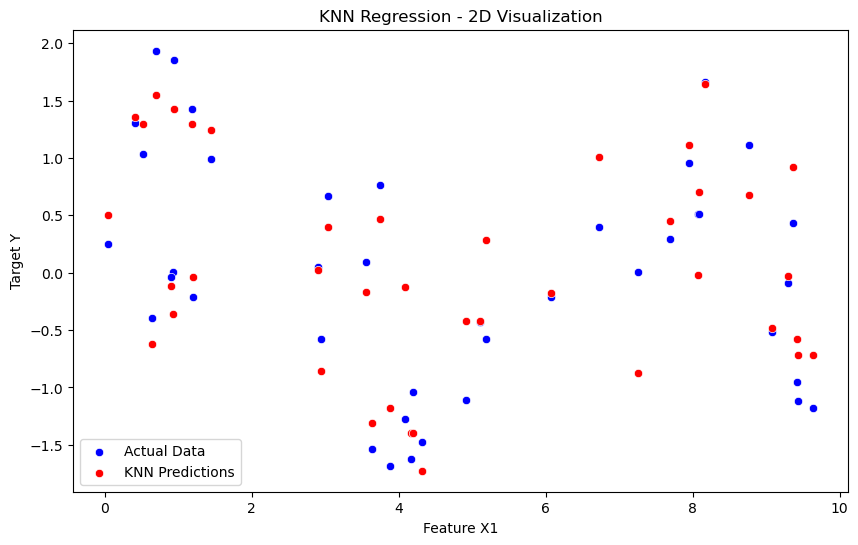

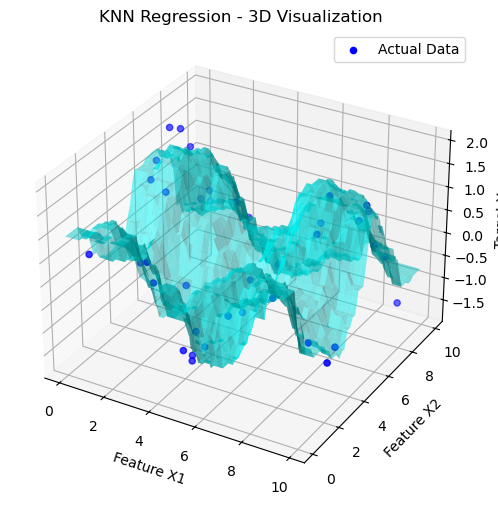

In [1]:
# טעינת ספריות מחדש לאחר איפוס הסביבה
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# יצירת נתונים דו-ממדיים (X1, X2) עם משתנה מטרה Y
np.random.seed(42)
X = np.random.rand(200, 2) * 10  # שני משתנים בלתי תלויים
Y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + np.random.randn(200) * 0.2  # פונקציה לא ליניארית

# חלוקה לסט אימון וסט בדיקה
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# נרמול הנתונים לשיפור ביצועי KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# יצירת מודל KNN עם K=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

# חיזוי על סט הבדיקה
Y_pred = knn.predict(X_test_scaled)

# ==========================
# גרף 1: תוצאה דו-ממדית של KNN
# ==========================

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test[:, 0], y=Y_test, color="blue", label="Actual Data")
sns.scatterplot(x=X_test[:, 0], y=Y_pred, color="red", label="KNN Predictions")
plt.xlabel("Feature X1")
plt.ylabel("Target Y")
plt.title("KNN Regression - 2D Visualization")
plt.legend()
plt.show()

# ==========================
# גרף 2: הדגמה תלת-ממדית של KNN
# ==========================

# יצירת רשת של נקודות לתצוגה חלקה
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.column_stack([X1_grid.ravel(), X2_grid.ravel()])

# נרמול הרשת
X_grid_scaled = scaler.transform(X_grid)

# חיזוי KNN
Y_grid_pred = knn.predict(X_grid_scaled).reshape(X1_grid.shape)

# יצירת גרף תלת-ממדי
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, color="blue", label="Actual Data")
ax.plot_surface(X1_grid, X2_grid, Y_grid_pred, color="cyan", alpha=0.5)

ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target Y")
ax.set_title("KNN Regression - 3D Visualization")
plt.legend()
plt.show()
